In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_dataset
from bimpcc.models.tvdenoising_model import PenalizedTVDenoisingMPCC
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [4]:
scale = 16

In [5]:
dataset = get_dataset("cameraman",scale=scale)
true, noisy = dataset.get_training_data()

(np.float64(-0.5), np.float64(15.5), np.float64(15.5), np.float64(-0.5))

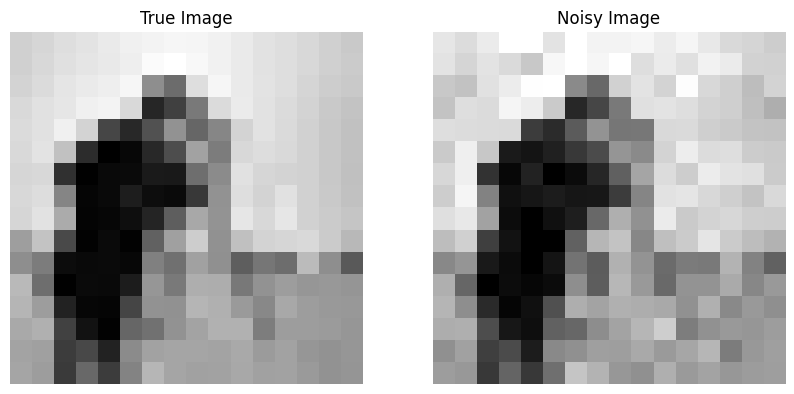

In [6]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(noisy,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [ ]:
model = PenalizedTVDenoisingMPCC(true,noisy, epsilon=10, pi_init=1000)

In [16]:
res,x_opt,fun_opt = model.solve(max_iter=1, mu_init=0.0001,tol=1e-3,print_level=5,verbose=True)

Iter   Termination_status            Objective      MPCC_compl          lg(mu)               π

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     4576
Number of nonzeros in inequality constraint Jacobian.:      480
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:     1457
                     variables with only lower bounds:      737
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1216
Total number of inequality constraints...............:      240
        inequality constraints with only lower bounds:      240
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.4809415e-01 8.35e-01 1.45e+00  -4.0 0.00e+00    -  0.00e+00 0.00e+00 

0                 0  3.3910211333340645      0.40271853963224014               -4.0               1

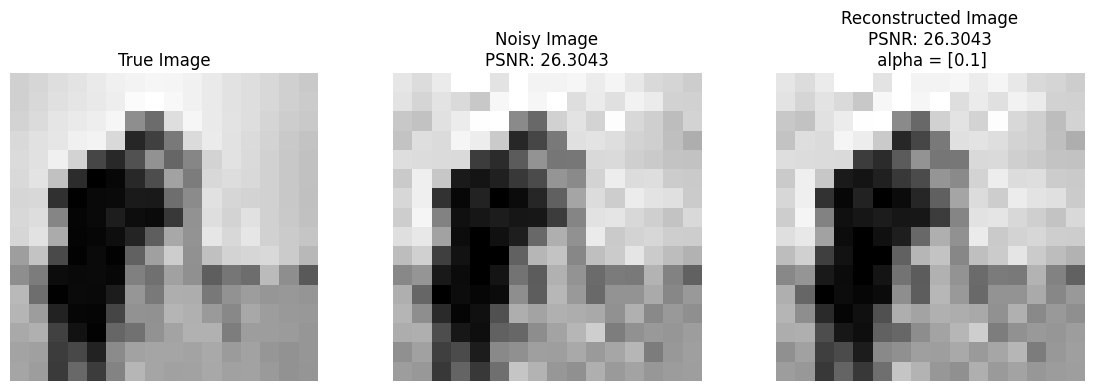

In [15]:
u, q, r, delta, theta, alpha = model.parse_vars_fn(x_opt)
u = u.reshape((scale,scale))
plot_experiment(true,noisy,u,alpha)

In [12]:
print(delta)

[0.74088498 0.73483748 0.96153554 1.02967801 1.05335245 1.06108778
 1.06266369 1.06309814 1.06320471 1.06321507 1.0632175  1.00868871
 0.57147433 0.49769252 0.61262473 0.30184236 0.60408677 0.84597261
 0.78791926 0.64398382 0.97295618 1.03388277 1.05204688 1.06321076
 1.0632204  1.06322475 1.02765598 0.60170519 0.45620636 0.21597347
 0.42534872 0.29129771 1.02357846 1.02065561 1.02864021 1.03953738
 1.06321924 1.06323175 1.06323564 1.06323575 1.06323493 1.0631445
 0.84258266 0.57004032 0.16009159 0.17085509 0.38558504 0.56432642
 1.06323553 1.06323563 1.06323593 1.06323552 1.06323517 1.063237
 1.06323651 1.06323577 1.06323486 1.06323431 1.06322278 0.63645304
 0.45641816 0.55496669 0.78174017 0.9697205  1.06323737 1.06323724
 1.06323724 1.06323739 1.06323743 1.06323669 1.06323621 1.06323657
 1.0632352  1.0632339  1.06322747 0.58982579 0.75695237 1.06323006
 0.99537997 0.73239837 0.93500561 1.06313988 1.06323675 1.06323681
 1.06323679 1.06323647 1.06323628 1.06323196 1.06322796 1.0048374